In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("/content/Dataset- Superstore (2015-2018).csv")
sales_data = df[['Order Date', 'Sales']]

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data.head()

/tmp/ipython-input-638533335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])


Order Date     Sales
0 2016-11-08  261.9600
1 2016-11-08  731.9400
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680

In [ ]:
df1 = sales_data.set_index('Order Date')
monthly_sales = df1.resample('ME').sum()
monthly_sales.head()

Sales
Order Date           
2014-01-31  14236.895
2014-02-28   4519.892
2014-03-31  55691.009
2014-04-30  28295.345
2014-05-31  23648.287

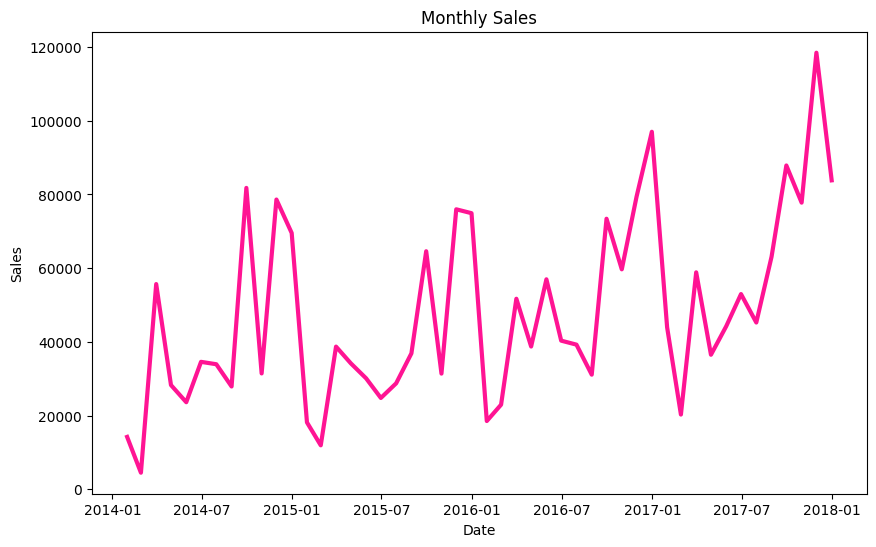

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Sales'], linewidth=3, c='deeppink')
plt.title("Monthly Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Sales'])

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758
Stationary


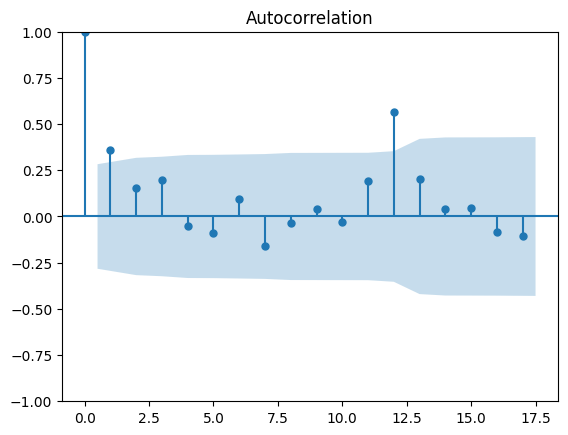

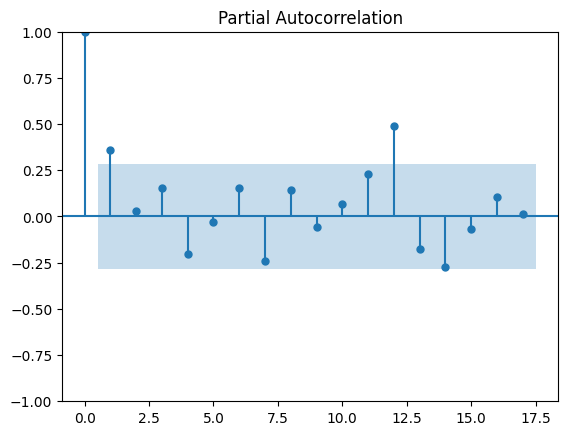

In [ ]:
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()

In [ ]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


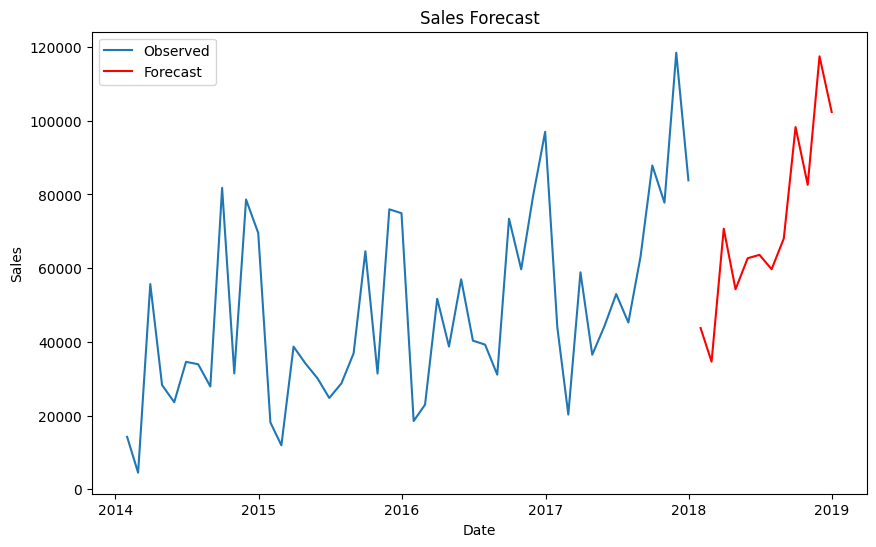

In [ ]:
forecast_periods = 12
forecast = results.forecast(steps=forecast_periods)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
observed = monthly_sales.tail(forecast_periods)

mae = mean_absolute_error(observed, forecast)
mse = mean_squared_error(observed, forecast)

print("MAE:", mae)
print("MSE:", mse)


MAE: 10611.591984026598
MSE: 151953342.15188608
